In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

In [3]:
data_dir = ('dataset/Training')
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))   

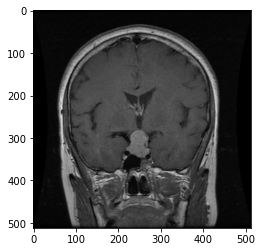

In [4]:
plt.imshow(img_array)

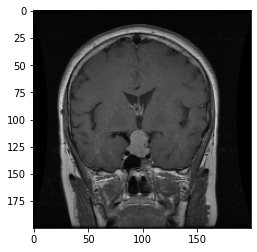

In [5]:
new_size = 200
new_array = cv2.resize(img_array,(new_size,new_size))    
plt.imshow(new_array,cmap = "gray")

In [7]:
x_train=[]
y_train=[]

for i in categories:
    train_path = os.path.join(data_dir,i)
    for j in os.listdir(train_path):
        img = cv2.imread(os.path.join(train_path,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(new_size,new_size))
        x_train.append(img)
        y_train.append(i)

In [8]:
x_train=np.array(x_train)
x_train=x_train/255.0
x_train = x_train.reshape(-1,new_size,new_size,1)
x_train.shape

(2870, 200, 200, 1)

In [9]:
y_train = np.array(y_train)
y_train.shape

(2870,)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [11]:
import tensorflow as tf

In [12]:
y_train_new = []
for i in y_train:
    y_train_new.append(categories.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_val_new = []
for i in y_val:
    y_val_new.append(categories.index(i))
y_val = y_val_new
y_val = tf.keras.utils.to_categorical(y_val)

In [13]:
X_train.shape, y_train.shape

((2296, 200, 200, 1), (2296, 4))

In [14]:
X_val.shape, y_val.shape

((574, 200, 200, 1), (574, 4))

In [15]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator


In [25]:
epochs = 30
batch_size = 32

In [26]:
datagen = ImageDataGenerator(featurewise_center=False,samplewise_center=False,featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    zoom_range = 0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    vertical_flip=False)  
    

In [27]:
##Model 1 non Regularized
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, padding= 'Same', activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=3, padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=3, padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=3, padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=3, padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=512, kernel_size=3, padding= 'Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#FLATTENING

model.add(Flatten())
model.add(Dense(1024, activation = "relu"))

model.add(Dense(512, activation = "relu"))

model.add(Dense(4, activation = "sigmoid"))

#optimizer Used

model.compile(optimizer = 'SGD', loss = "categorical_crossentropy", metrics=["accuracy"])

In [28]:
datagen.fit(X_train)
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val))

Epoch 1/30
72/72 [==============================] - 344s 5s/step - loss: 1.3703 - accuracy: 0.4146 - val_loss: 1.3552 - val_accuracy: 0.2875
Epoch 2/30
72/72 [==============================] - 328s 5s/step - loss: 1.3520 - accuracy: 0.3968 - val_loss: 1.3395 - val_accuracy: 0.3118
Epoch 3/30
72/72 [==============================] - 343s 5s/step - loss: 1.3389 - accuracy: 0.4386 - val_loss: 1.3242 - val_accuracy: 0.4321
Epoch 4/30
72/72 [==============================] - 364s 5s/step - loss: 1.3197 - accuracy: 0.4756 - val_loss: 1.3003 - val_accuracy: 0.4321
Epoch 5/30
72/72 [==============================] - 374s 5s/step - loss: 1.2665 - accuracy: 0.4887 - val_loss: 1.2076 - val_accuracy: 0.5052
Epoch 6/30
72/72 [==============================] - 398s 6s/step - loss: 1.1512 - accuracy: 0.5091 - val_loss: 1.0855 - val_accuracy: 0.5505
Epoch 7/30
72/72 [==============================] - 346s 5s/step - loss: 1.0637 - accuracy: 0.5514 - val_loss: 1.1874 - val_accuracy: 0.5139
Epoch 8/30
72

In [29]:
##Model 2 of Batchnormalization

model1 = Sequential()
model1.add(Conv2D(filters=64, kernel_size=3, padding= 'Same', activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1)))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(filters=128, kernel_size=3, padding= 'Same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(filters=128, kernel_size=3, padding= 'Same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(filters=256, kernel_size=3, padding= 'Same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(filters=256, kernel_size=3, padding= 'Same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(filters=512, kernel_size=3, padding= 'Same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Flatten())
model1.add(Dense(1024, activation = "relu"))
model1.add(Dropout(0.2))

model1.add(Dense(512, activation = "relu"))
model1.add(Dropout(0.2))

model1.add(Dense(4, activation = "softmax"))

model1.compile(optimizer = 'SGD' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [32]:
history1 = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                                epochs = epochs, validation_data = (X_val,y_val))

Epoch 1/30
72/72 [==============================] - 351s 5s/step - loss: 0.2218 - accuracy: 0.9186 - val_loss: 0.3399 - val_accuracy: 0.8728
Epoch 2/30
72/72 [==============================] - 359s 5s/step - loss: 0.2010 - accuracy: 0.9207 - val_loss: 0.6214 - val_accuracy: 0.7561
Epoch 3/30
72/72 [==============================] - 388s 5s/step - loss: 0.1864 - accuracy: 0.9277 - val_loss: 0.3386 - val_accuracy: 0.8798
Epoch 4/30
72/72 [==============================] - 366s 5s/step - loss: 0.1640 - accuracy: 0.9443 - val_loss: 0.3786 - val_accuracy: 0.8606
Epoch 5/30
72/72 [==============================] - 334s 5s/step - loss: 0.1750 - accuracy: 0.9303 - val_loss: 0.2966 - val_accuracy: 0.9059
Epoch 6/30
72/72 [==============================] - 334s 5s/step - loss: 0.2148 - accuracy: 0.9281 - val_loss: 0.4250 - val_accuracy: 0.8310
Epoch 7/30
72/72 [==============================] - 324s 5s/step - loss: 0.1412 - accuracy: 0.9464 - val_loss: 0.4447 - val_accuracy: 0.8746
Epoch 8/30
72

Text(0.5, 1.0, 'Accuracy regularized model')

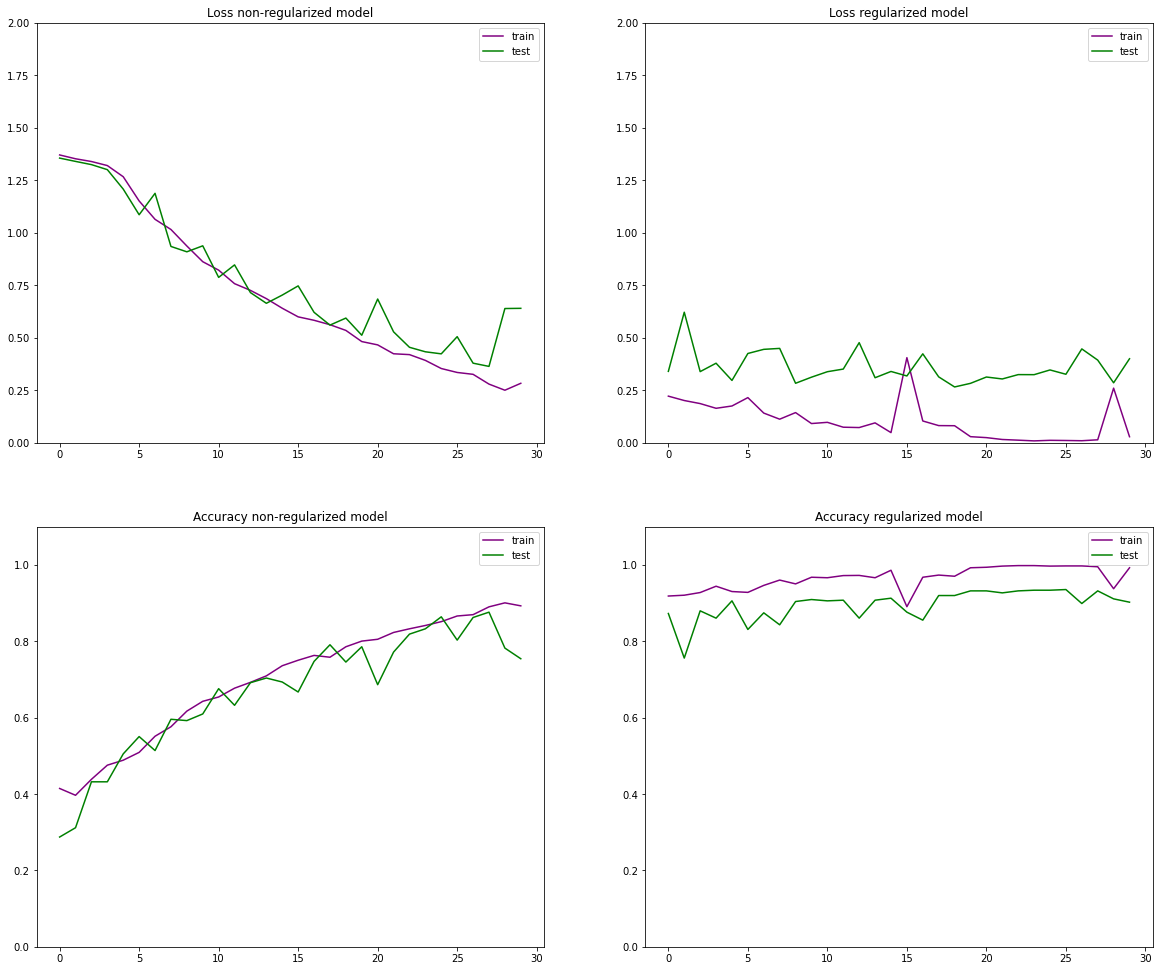

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(20,17))

axs[0, 0].plot(history.history["loss"],c = "purple")
axs[0, 0].plot(history.history["val_loss"],c = "green")
axs[0, 0].set_ylim([0,2])
axs[0, 0].legend(["train", "test"])
axs[0, 0].set_title('Loss non-regularized model')

axs[0, 1].plot(history1.history["loss"],c = "purple")
axs[0, 1].plot(history1.history["val_loss"],c = "green")
axs[0, 1].set_ylim([0,2])
axs[0, 1].legend(["train", "test"])
axs[0, 1].set_title('Loss regularized model')

axs[1, 0].plot(history.history["accuracy"],c = "purple")
axs[1, 0].plot(history.history["val_accuracy"],c = "green")
axs[1, 0].set_ylim([0,1.1])
axs[1, 0].legend(["train", "test"])
axs[1, 0].set_title('Accuracy non-regularized model')

axs[1, 1].plot(history1.history["accuracy"],c = "purple")
axs[1, 1].plot(history1.history["val_accuracy"],c = "green")
axs[1, 1].set_ylim([0,1.1])
axs[1, 1].legend(["train", "test"])
axs[1, 1].set_title('Accuracy regularized model')

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 64)      640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 100, 100, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 100, 100, 128)     73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 50, 50, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 50, 50, 128)       147584    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 25, 25, 128)     

In [37]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 200, 200, 64)      640       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 100, 100, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_19 (Conv2D)          (None, 100, 100, 128)     73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 50, 50, 128)      0         
 g2D)                                                            
                                                      

# Performance on Validation set

In [38]:
X_val.shape, y_val.shape

((574, 200, 200, 1), (574, 4))

In [79]:
# 1st model
y_pred = model.predict(X_val)
print(y_pred[:5])

[[9.9976081e-01 2.6638347e-01 3.4859478e-02 4.0053636e-02]
 [7.5718015e-02 1.8211594e-01 7.0685148e-04 9.9999702e-01]
 [9.9997425e-01 9.2614067e-01 9.5362365e-03 6.8220496e-04]
 [9.9999839e-01 5.2687711e-01 4.9630933e-05 7.1649700e-02]
 [8.1752098e-08 8.3247292e-01 9.3359947e-03 1.0000000e+00]]


In [80]:
# printing 5 prediction
class_pred = [np.argmax(i) for i in y_pred]
print(class_pred[:5])

[0, 3, 0, 0, 3]


In [81]:
#printing  lebels cooresponding to them
val_labels =[np.argmax(i) for i in y_val]
print(val_labels[:5])

[0, 3, 0, 0, 3]


In [82]:
#classification report
from sklearn.metrics import classification_report

report = classification_report(val_labels, class_pred)

print(report)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       179
           1       0.94      0.76      0.84       169
           2       0.88      0.86      0.87        70
           3       0.96      0.97      0.97       156

    accuracy                           0.90       574
   macro avg       0.91      0.90      0.90       574
weighted avg       0.91      0.90      0.90       574



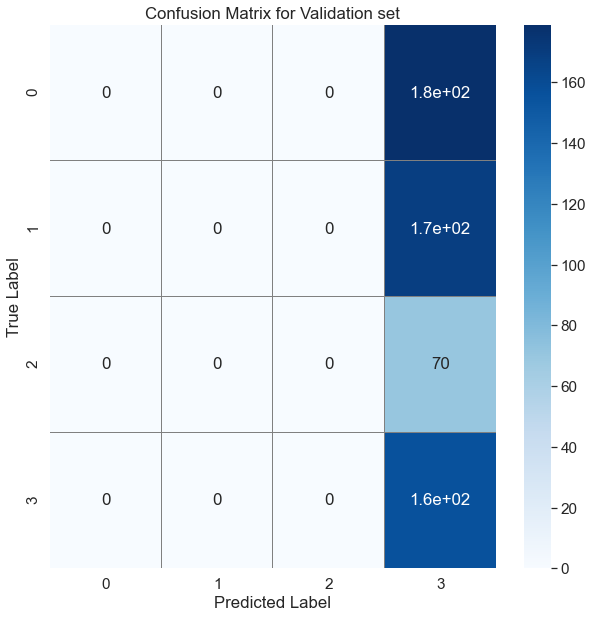

In [60]:
#confusion matrix for model 1
from sklearn.metrics import confusion_matrix

f,ax = plt.subplots(figsize=(10, 10))
confusion_mtx = confusion_matrix(val_labels, class_pred)
sns.set(font_scale=1.4)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray",ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Validation set")
plt.show()

# Performace on test Data

In [61]:
data_dir_test=('dataset/Testing/')

In [62]:
#Defining x_test and y_test
x_test=[]
y_test=[]

for i in categories:
    test_path = os.path.join(data_dir_test,i)
    for j in os.listdir(test_path):
        img = cv2.imread(os.path.join(test_path,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(new_size,new_size))
        x_test.append(img)
        y_test.append(i)

In [63]:
x_test=np.array(x_test)
x_test=x_test/255.0
x_test=x_test.reshape(-1,new_size,new_size,1)
x_test.shape

(394, 200, 200, 1)

In [64]:
y_test=np.array(y_test)
y_test.shape

(394,)

In [65]:
y_test_new = []
for i in y_test:
    y_test_new.append(categories.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [66]:
#Prediction of model 1on test set
predicted_labels = model1.predict(x_test)
print(predicted_labels[:5])

[[0.23629186 0.24747778 0.24177113 0.27445918]
 [0.23520349 0.2486971  0.24054666 0.2755527 ]
 [0.24050911 0.2430324  0.23806788 0.27839056]
 [0.23976703 0.24354966 0.23755002 0.2791333 ]
 [0.23976703 0.24354966 0.23755002 0.2791333 ]]


In [67]:
predicted_labels = [np.argmax(i) for i in predicted_labels]
print(predicted_labels[:5])

[3, 3, 3, 3, 3]


In [68]:
original_labels =[np.argmax(i) for i in y_test]
print(original_labels[:5])

[0, 0, 0, 0, 0]


In [69]:
#report of test set of model1
report2 = classification_report(original_labels, predicted_labels)

print(report2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       115
           2       0.00      0.00      0.00       105
           3       0.19      1.00      0.32        74

    accuracy                           0.19       394
   macro avg       0.05      0.25      0.08       394
weighted avg       0.04      0.19      0.06       394



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


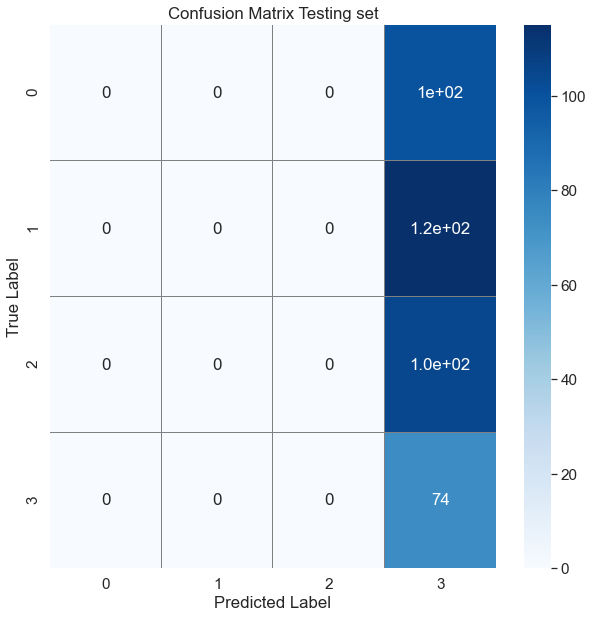

In [70]:
#confusion matrix for test set
f,ax = plt.subplots(figsize=(10, 10))
confusion_mtx2 = confusion_matrix(original_labels, predicted_labels)
sns.set(font_scale=1.4)
sns.heatmap(confusion_mtx2, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray",ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Testing set")
plt.show()